<a href="https://colab.research.google.com/github/EduHdzVillasana/UdemyDS/blob/main/Seccion%2015/TensorFlow-Se%C3%B1ales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/joanby/python-ml-course/blob/master/notebooks/T11%20-%201%20-%20TensorFlow101-Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!git clone https://github.com/joanby/python-ml-course.git

Cloning into 'python-ml-course'...
remote: Enumerating objects: 17706, done.
remote: Total 17706 (delta 0), reused 0 (delta 0), pack-reused 17706
Receiving objects: 100% (17706/17706), 519.26 MiB | 25.99 MiB/s, done.
Resolving deltas: 100% (351/351), done.
Checking out files: 100% (16940/16940), done.


In [16]:
from google.colab import drive
drive.mount('/content/drive')
# Test it
!ls '/content/drive/My Drive' 

Mounted at /content/drive
 20210506_135603.mp4
 Classroom
'Colab Notebooks'
 Credencial_INE.pdf
 Credencial.pdf
'Curso de Python'
'Datos Abiertos'
 Evidencias
'Excel Test.pptx'
'Formato Experimento.docx'
'Fundamento Teorico.gdoc'
'Fundamento Teorico - Gráfico de barras 1.gsheet'
 GitHub
 HPSCAN_2020080918340218.jpeg
'Lenguajes Modernos'
 LPOO
 Modelos
'PIA FISICA.gdoc'
 PL_Tarea2_Extra.ipynb
 Practica11_Semana12.docx
'Proyecto Bedu R'
'Python Scripts'
 Referencias.gdoc
'Reporte 2.docx'
 Reto2_movies.png
 Reto2_ratings.png
 Reto3_movies.png
'Reto 3.png'
 Reto3_ratings.png
 SkyBox.rar
'Take-home case v2 - Javier.xlsx'
 TutorialJV.rar


In [17]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


# Introducción a Tensor Flow

In [3]:
import tensorflow as tf
print(tf.__version__)

1.15.2


In [4]:
x1 = tf.constant([1,2,3,4,5])
x2 = tf.constant([6,7,8,9,10])

In [5]:
res = tf.multiply(x1,x2)
print(res)

Tensor("Mul:0", shape=(5,), dtype=int32)


In [6]:
sess = tf.Session()
print(sess.run(res))
sess.close()

[ 6 14 24 36 50]


In [7]:
with tf.Session() as sess:
    output = sess.run(res)
    print(output)

[ 6 14 24 36 50]


In [8]:
config = tf.ConfigProto(log_device_placement = True)
config = tf.ConfigProto(allow_soft_placement = True)

# Reconocimiento de las señales de tráfico


In [9]:
import os
import skimage.io as imd
import numpy as np

In [10]:
def load_ml_data(data_directory):
    dirs = [d for d in os.listdir(data_directory)
            if os.path.isdir(os.path.join(data_directory,d))]
    
    labels = []
    images = []
    for d in dirs:
        label_dir = os.path.join(data_directory, d)
        file_names = [os.path.join(label_dir, f)
                     for f in os.listdir(label_dir)
                     if f.endswith(".ppm")]
        
        for f in file_names:
            images.append(imd.imread(f))
            labels.append(int(d))
        
    return images, labels

In [18]:
main_dir = "/content/python-ml-course/datasets/belgian/"
train_data_dir = os.path.join(main_dir, "Training")
test_data_dir = os.path.join(main_dir, "Testing")

In [19]:
images, labels = load_ml_data(train_data_dir)

In [21]:
images = np.array(images)
labels = np.array(labels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [22]:
images.ndim

1

In [23]:
images.size

4575

In [24]:
images[0]

array([[[39, 42, 35],
        [39, 42, 34],
        [39, 40, 32],
        ...,
        [17, 15, 14],
        [16, 14, 13],
        [15, 14, 13]],

       [[40, 42, 36],
        [39, 41, 34],
        [37, 38, 31],
        ...,
        [17, 15, 14],
        [16, 15, 14],
        [16, 15, 14]],

       [[37, 40, 34],
        [37, 39, 33],
        [36, 37, 31],
        ...,
        [17, 15, 15],
        [17, 15, 14],
        [17, 15, 14]],

       ...,

       [[30, 30, 23],
        [29, 29, 22],
        [29, 29, 21],
        ...,
        [21, 21, 15],
        [22, 23, 17],
        [25, 26, 18]],

       [[32, 32, 25],
        [32, 33, 25],
        [32, 33, 25],
        ...,
        [18, 19, 13],
        [20, 21, 14],
        [22, 23, 16]],

       [[31, 31, 24],
        [31, 31, 24],
        [31, 32, 24],
        ...,
        [18, 19, 13],
        [20, 21, 15],
        [23, 24, 18]]], dtype=uint8)

In [25]:
labels.ndim

1

In [26]:
labels.size

4575

In [27]:
len(set(labels))

62

In [28]:
images.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [29]:
images.itemsize

8

In [30]:
images.nbytes

36600

In [31]:
images.nbytes/images.itemsize

4575.0

In [32]:
import matplotlib.pyplot as plt

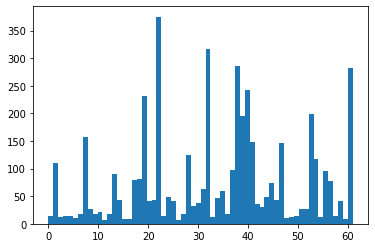

In [33]:
plt.hist(labels, len(set(labels)))
plt.show()